<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

In [1]:
!pip install transformers --quiet   

In [1]:
import tensorflow as tf

# Create a tensor on the GPU
with tf.device('/GPU:0'):
  a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
  b = tf.constant([[1.0, 1.0], [1.0, 1.0]])
  c = a + b

print(c)

tf.Tensor(
[[2. 3.]
 [4. 5.]], shape=(2, 2), dtype=float32)


In [2]:
import tensorflow
from transformers import TFBertModel
import numpy as np

c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Definiendo modelo

In [3]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
max_length = 140
output_shape = 3

In [5]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [7]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [9]:
import gdown

# Descargar apps.csv
url_apps = 'https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV'
output_apps = 'apps.csv'
gdown.download(url_apps, output_apps, quiet=False)

# Descargar reviews.csv
url_reviews = 'https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv'
output_reviews = 'reviews.csv'
gdown.download(url_reviews, output_reviews, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
To: c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\desafios\apps.csv
100%|██████████| 134k/134k [00:00<00:00, 4.14MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\desafios\reviews.csv
100%|██████████| 7.17M/7.17M [00:01<00:00, 5.61MB/s]


'reviews.csv'

In [10]:

import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [11]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


<Axes: xlabel='score', ylabel='count'>

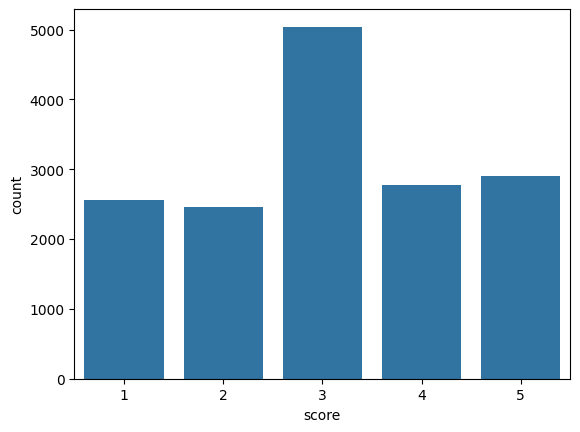

In [12]:
import seaborn as sns
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

## Limpieza de datos

In [13]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

C:\Users\leand\AppData\Local\Temp\ipykernel_13320\116706431.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names);


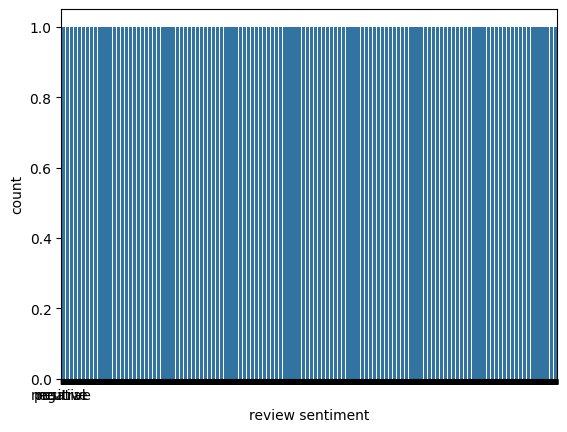

In [14]:
import matplotlib.pyplot as plt

ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [15]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


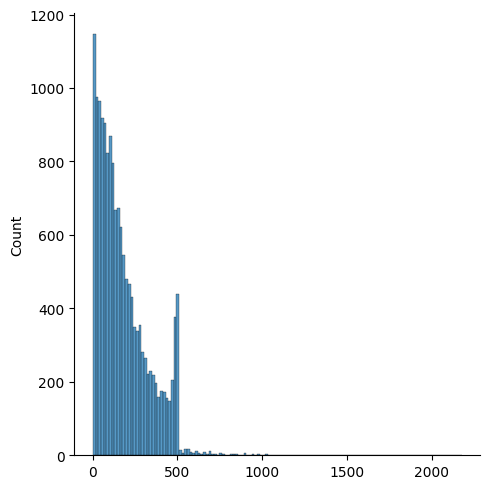

In [16]:
import numpy as np

sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## 1 - Data generator


In [19]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer

In [20]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\my_env\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [22]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [23]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [24]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [25]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [26]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [27]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [28]:
model1 = model

In [29]:
history1 = model1.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


315/315 [==============================] - 1318s 4s/step - loss: 1.1120 - accuracy: 0.4057 - f1_score: 0.3999 - val_loss: 1.0259 - val_accuracy: 0.5024 - val_f1_score: 0.4019
Epoch 2/5
315/315 [==============================] - 1262s 4s/step - loss: 1.0312 - accuracy: 0.4697 - f1_score: 0.4606 - val_loss: 0.9538 - val_accuracy: 0.5484 - val_f1_score: 0.5252
Epoch 3/5
315/315 [==============================] - 1260s 4s/step - loss: 0.9993 - accuracy: 0.4916 - f1_score: 0.4815 - val_loss: 0.9439 - val_accuracy: 0.5357 - val_f1_score: 0.4759
Epoch 4/5
315/315 [==============================] - 1259s 4s/step - loss: 0.9664 - accuracy: 0.5178 - f1_score: 0.5069 - val_loss: 0.9397 - val_accuracy: 0.5214 - val_f1_score: 0.4917
Epoch 5/5
315/315 [==============================] - 1249s 4s/step - loss: 0.9705 - accuracy: 0.5142 - f1_score: 0.5048 - val_loss: 0.9362 - val_accuracy: 0.5540 - val_f1_score: 0.4634


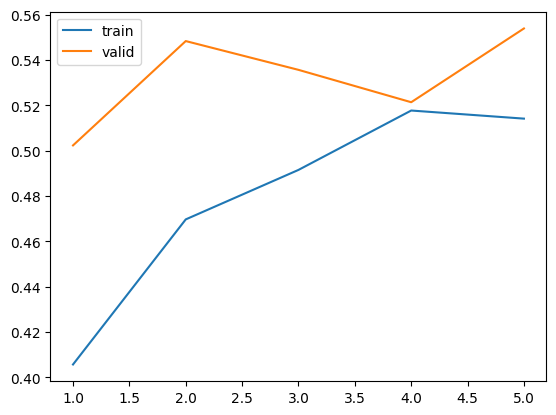

In [30]:
plot_train_metrics(history1)

In [31]:
y_hat_prob = model1.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 293s 3s/step


array([[0.570541  , 0.24883519, 0.18062377],
       [0.5324877 , 0.17096435, 0.29654804],
       [0.25873542, 0.28299367, 0.45827088]], dtype=float32)

In [32]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [33]:
# Calcular la exactitud (accuracy)
scores = model1.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 286s 3s/step - loss: 0.9312 - accuracy: 0.5603 - f1_score: 0.4691


0.5603174567222595

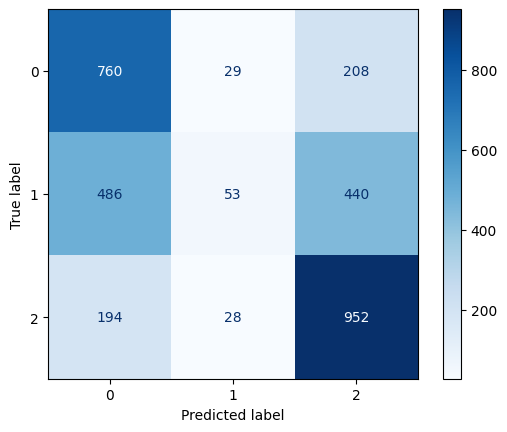

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(3)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## 3 - BERT Fine tuning

In [64]:
from keras.optimizers import Adam


In [68]:
model2 = model1

# Colocar todas las layers como entrenables
for layer in model2.layers:
  layer.trainable = True

# Como es fine tunning se recomiendo utiliza al menos un learning rate 100 veces
# menor
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x000001DA8A767A40>

In [ ]:
history2 = model2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 120s 381ms/step - loss: 0.9494 - accuracy: 0.5327 - f1_score: 0.5219 - val_loss: 0.9143 - val_accuracy: 0.5560 - val_f1_score: 0.4666
Epoch 2/5
315/315 [==============================] - 123s 392ms/step - loss: 0.9482 - accuracy: 0.5285 - f1_score: 0.5180 - val_loss: 0.8988 - val_accuracy: 0.5647 - val_f1_score: 0.4912
Epoch 3/5
315/315 [==============================] - 143s 455ms/step - loss: 0.9408 - accuracy: 0.5398 - f1_score: 0.5285 - val_loss: 0.8813 - val_accuracy: 0.5722 - val_f1_score: 0.5486
Epoch 4/5
315/315 [==============================] - 123s 391ms/step - loss: 0.9334 - accuracy: 0.5432 - f1_score: 0.5326 - val_loss: 0.8811 - val_accuracy: 0.5746 - val_f1_score: 0.5274
Epoch 5/5
315/315 [==============================] - 123s 392ms/step - loss: 0.9311 - accuracy: 0.5520 - f1_score: 0.5415 - val_loss: 0.8906 - val_accuracy: 0.5615 - val_f1_score: 0.4819


In [ ]:
plot_train_metrics(history2)

In [ ]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

In [ ]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model1.evaluate(X_test, y_test)
scores[1]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## Salvar el modelo

In [ ]:
model2.save_weights('bert_weights.h5')

In [ ]:
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
files.download('bert_weights.h5')

## Levantar el modelo

In [ ]:
bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')

# attention_mask - is a binary mask which tells BERT which tokens to attend and which not to attend.
# Encoder will add the 0 tokens to the some sequence which smaller than MAX_SEQUENCE_LENGTH,
# and attention_mask, in this case, tells BERT where is the token from the original data and where is 0 pad token:
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Get the pooled_output (embedding que representa toda la entrada)
output = bert_model3([input_ids, attention_mask])[1]

# We can also add dropout as regularization technique:
output = tensorflow.keras.layers.Dropout(rate=0.2)(output)

# Se puede agregar más capas Densas en el medio si se desea

# Provide number of classes to the final layer:
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# Final model:
model3 = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

In [ ]:
model3.load_weights('bert_weights.h5')

## Ensayo

In [ ]:
text = "I love this app!"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

In [ ]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [ ]:
y_prob_ensayo = model3.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
print("Clasificación:", class_names[int(y_prob)])

## Conclusiones

Se puede apreciar que luego de realizar el fine tuning el modelo se ajusta mucho mejor al problema. Existen diferentes formas de llevar a cabo este proceso, es importante que el learning rate sea mucho menor.\
Existen optimizadores pensados para fine tuning que realizan el ajuste de learning rate adaptativo a medida que se va entrenando capas más profundas del modelo.

###Desafio 5

Procederemos primero a probar una arquitectura modificada del ejercicio anterior, sumando una capa densa adicional al modelo y probando su performance

In [1]:
import tensorflow
from transformers import TFBertModel
import numpy as np

from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer

c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
max_length = 140
output_shape = 3

In [3]:
# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\my_env\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [5]:
# Congelamos los pesos del modelo BERT
bert_model.bert.trainable = False

# Definimos las entradas
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

# Obtenemos las salidas del modelo BERT
outputs = bert_model(input_ids, attention_mask=attention_mask)

# Extraemos el pooled_output
pooled_output = outputs.pooler_output

# Añadimos una nueva capa densa adicional
x = tensorflow.keras.layers.Dense(128, activation='relu')(pooled_output)

# Añadimos Dropout
x = tensorflow.keras.layers.Dropout(0.2)(x)

# Añadimos la capa de salida
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Creamos el modelo
model3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compilamos el modelo
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.F1Score(average='macro')])


In [7]:

model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [8]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

In [9]:
import gdown

# Descargar apps.csv
url_apps = 'https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV'
output_apps = 'apps.csv'
gdown.download(url_apps, output_apps, quiet=False)

# Descargar reviews.csv
url_reviews = 'https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv'
output_reviews = 'reviews.csv'
gdown.download(url_reviews, output_reviews, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
To: c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\desafios\apps.csv
100%|██████████| 134k/134k [00:00<00:00, 2.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: c:\Users\leand\OneDrive\Documents\LRDocs\Estudio\Facultad\Posgrado-Esp-IA\NLP\NLP\tps\desafios\reviews.csv
100%|██████████| 7.17M/7.17M [00:01<00:00, 6.39MB/s]


'reviews.csv'

In [10]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


<Axes: xlabel='score', ylabel='count'>

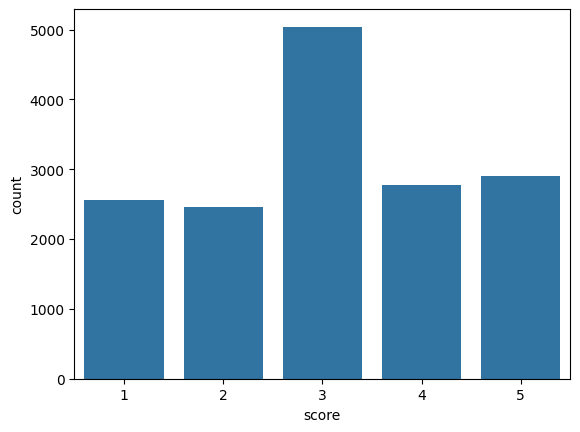

In [11]:
import seaborn as sns
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

In [12]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

In [13]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

In [14]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [15]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [16]:
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)


In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


In [19]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [20]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [21]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [22]:
y_test = y[idx_test]

In [23]:
history = model3.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5


315/315 [==============================] - 1944s 6s/step - loss: 1.0545 - accuracy: 0.4346 - f1_score: 0.4124 - val_loss: 0.9645 - val_accuracy: 0.5317 - val_f1_score: 0.4444
Epoch 2/5
315/315 [==============================] - 1504s 5s/step - loss: 0.9745 - accuracy: 0.5057 - f1_score: 0.4757 - val_loss: 0.9200 - val_accuracy: 0.5512 - val_f1_score: 0.4805
Epoch 3/5
315/315 [==============================] - 1299s 4s/step - loss: 0.9365 - accuracy: 0.5361 - f1_score: 0.5064 - val_loss: 0.8792 - val_accuracy: 0.5611 - val_f1_score: 0.5199
Epoch 4/5
315/315 [==============================] - 1246s 4s/step - loss: 0.9249 - accuracy: 0.5424 - f1_score: 0.5174 - val_loss: 0.8824 - val_accuracy: 0.5655 - val_f1_score: 0.5099
Epoch 5/5
315/315 [==============================] - 1252s 4s/step - loss: 0.9086 - accuracy: 0.5513 - f1_score: 0.5287 - val_loss: 0.8612 - val_accuracy: 0.5750 - val_f1_score: 0.5082


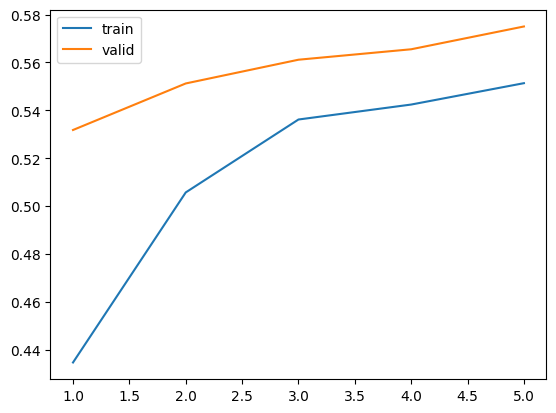

In [25]:
import matplotlib.pyplot as plt

plot_train_metrics(history)

Probamos otra arquitectura sin realizar el balanceo de clases:

In [38]:
max_length = 140
output_shape = 3

In [39]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


<Axes: xlabel='score', ylabel='count'>

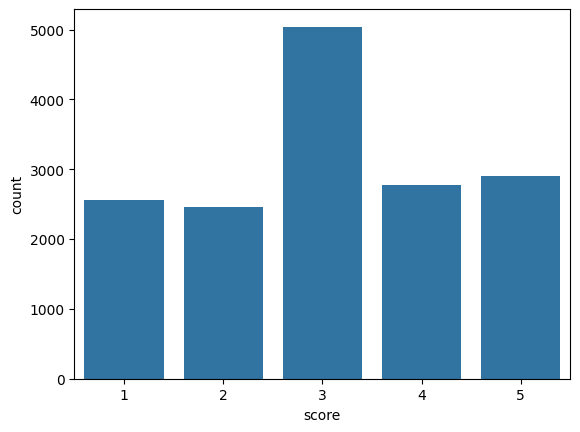

In [40]:
import seaborn as sns
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

In [ ]:
# Congelamos los pesos del modelo BERT
bert_model.bert.trainable = False

# Definimos las entradas
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

# Obtenemos las salidas del modelo BERT
outputs = bert_model(input_ids, attention_mask=attention_mask)

# Extraemos el pooled_output
pooled_output = outputs.pooler_output

# Añadimos una nueva capa densa adicional
x = tensorflow.keras.layers.Dense(128, activation='relu')(pooled_output)

# Añadimos Dropout
x = tensorflow.keras.layers.Dropout(0.2)(x)

# Añadimos la capa de salida
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Creamos el modelo
model3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compilamos el modelo
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.F1Score(average='macro')])


In [ ]:
# Congelamos los pesos del modelo BERT
bert_model.bert.trainable = False

# Definimos las entradas
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

# Obtenemos las salidas del modelo BERT
outputs = bert_model(input_ids, attention_mask=attention_mask)

# Extraemos el pooled_output
pooled_output = outputs.pooler_output

# Añadimos una nueva capa densa adicional
x = tensorflow.keras.layers.Dense(128, activation='relu')(pooled_output)

# Añadimos Dropout
x = tensorflow.keras.layers.Dropout(0.3)(x)  # Aumentamos ligeramente el dropout

# Añadimos la capa de salida
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Creamos el modelo
model3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Definimos el optimizador con learning rate ajustable
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)

# Compilamos el modelo
model3.compile(optimizer=optimizer,
               loss='categorical_crossentropy',
               metrics=['accuracy', tensorflow.keras.metrics.F1Score(average='macro', name='f1_macro')])


In [ ]:

# Función para calcular los pesos de las clases
def calculate_class_weights(y_train):
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    return dict(enumerate(class_weights))

# Función para entrenar el modelo
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    # Calculamos los pesos de las clases
    class_weights = calculate_class_weights(np.argmax(y_train, axis=1))

    # Definimos callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_macro', patience=3, mode='max', restore_best_weights=True)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_f1_macro', factor=0.2, patience=2, min_lr=1e-6, mode='max')

    # Entrenamos el modelo
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weights,
        callbacks=[early_stopping, reduce_lr]
    )

    return history

# Función para graficar las métricas de entrenamiento
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.lineplot(x=epoch_count, y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count, y=history.history['val_accuracy'], label='valid')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.subplot(1, 2, 2)
    sns.lineplot(x=epoch_count, y=history.history['f1_macro'], label='train')
    sns.lineplot(x=epoch_count, y=history.history['val_f1_macro'], label='valid')
    plt.title('F1-score (Macro)')
    plt.xlabel('Epoch')
    plt.ylabel('F1-score')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
# history = train_model(model3, X_train, y_train, X_val, y_val, epochs=20, batch_size=32)
# plot_train_metrics(history)

In [ ]:
history = model3.fit(train_data, epochs=5, validation_data=validation_data)

In [ ]:
plot_train_metrics(history)